## **Convolutional Neural Network (CNN)**

![cnn_final.png](https://drive.google.com/uc?id=1jYLJL3vQWKtfx4T8gD41KchivJ97xUn3)


# Extract the .zip file

In [2]:
!pip install google-colab


  Using cached google_colab-1.0.0-py2.py3-none-any.whl
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached portpicker-1.2.0-py3-none-any.whl
  Using cached requests-2.21.0-py2.py3-none-any.whl (57 kB)
  Using cached tornado-4.5.3-cp311-cp311-win_amd64.whl
  Using cached prompt_toolkit-1.0.18-py3-none-any.whl (245 kB)
  Using cached simplegeneric-0.8.1-py3-none-any.whl
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached idna-2.8-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.24.3-py2.py3-none-any.whl (118 kB)
INFO: pip is looking at multiple versions of jupyter-clie

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [841 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\pandas
      copying pandas\conftest.py -> build\lib.win-amd64-cpython-311\pandas
      copying pandas\testing.py -> build\lib.win-amd64-cpython-311\pandas
      copying pandas\_version.py -> build\lib.win-amd64-cpython-311\pandas
      copying pandas\__init__.py -> build\lib.win-amd64-cpython-311\pandas
      creating build\lib.win-amd64-cpython-311\pandas\api
      copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-311\pandas\api
      creating build\lib.win-amd64-cpython-311\pandas\arrays
      copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-311\pandas\arrays
      creating build\lib.win-amd64-cpython-311\pandas\compat
      copying 

In [6]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

SyntaxError: invalid syntax (3732597936.py, line 1)

In [ ]:
from zipfile import ZipFile
file_name = '/content/gdrive/MyDrive/PhD/TAShip/IC-272_2023/Tutorials/Tutorial-03/Data.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


# Load Libraries

First step is to load the required libraries.

In [13]:
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Dense , Conv2D, Flatten, MaxPooling2D

from tensorflow.keras.utils import to_categorical

# Load images from the dataset

In the root directory, there is a `Data' folder containing two separate folders containing the train and test data, respectively. Inside these folders, we have multiple folders each corresponding to a particular "digit class" and each of them contains images of that class. In the given dataset, we have $10$ folders each in train and test corresponding to the $10$ classes $(0,1,...,9)$. Our first task is to extract the images from the dataset as numpy arrays.

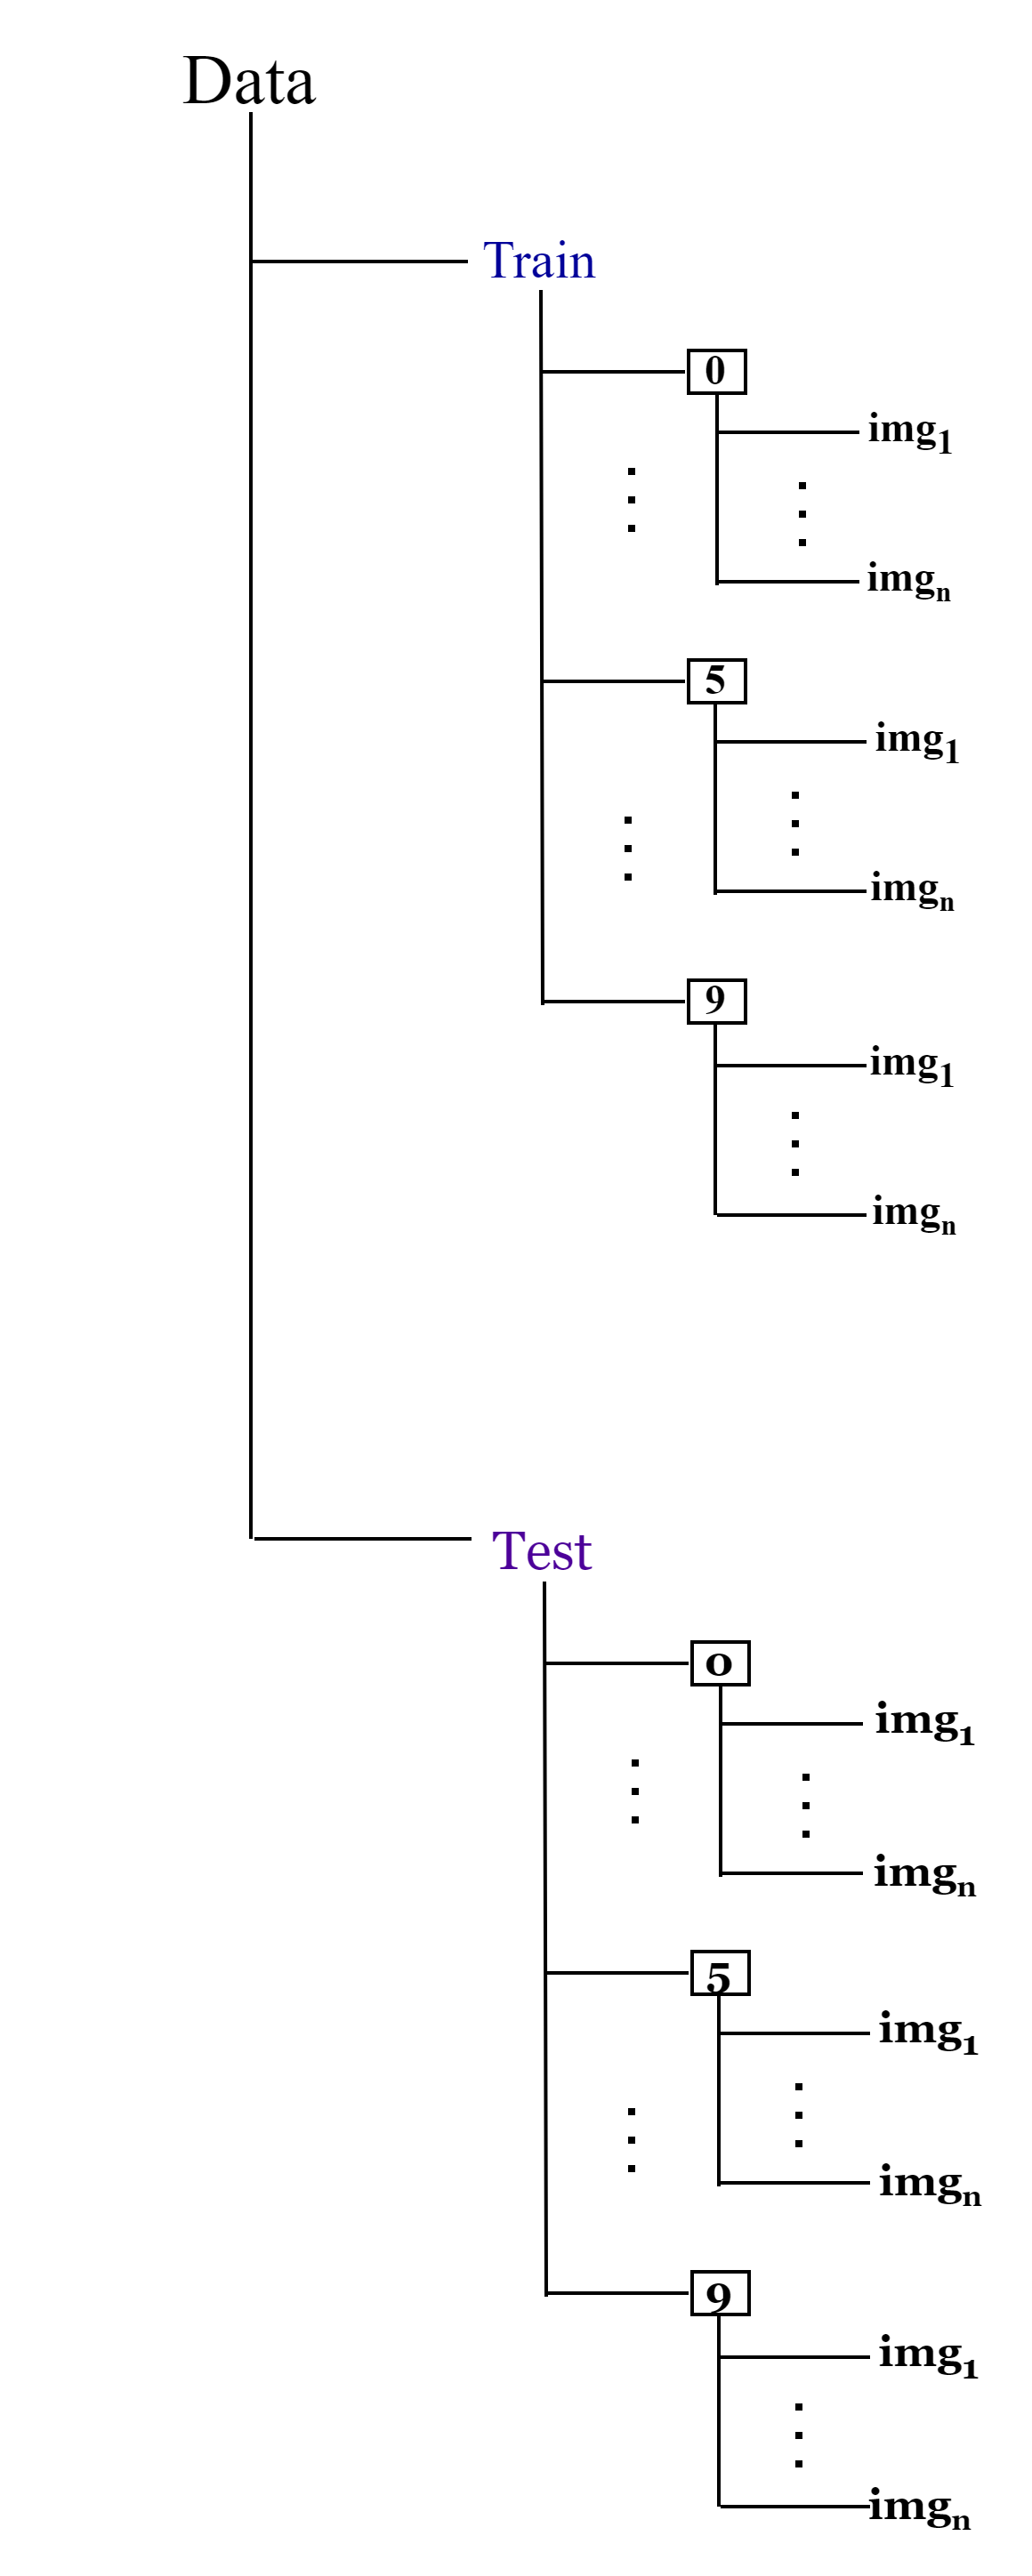

In [7]:
import os

import cv2

# load data from the path specified by the user

def data_loader(path_train, path_test):
  train_list=os.listdir(path_train)

  # Number of classes in the dataset
  num_classes=len(train_list)

  # Empty lists for loading training and testing data images as well as corresponding labels
  x_train=[]
  y_train=[]
  x_test=[]
  y_test=[]

  # Loading training data
  for label, folder in enumerate(train_list):
    path1 = path_train+'/'+str(folder)
    images = os.listdir(path1)
    for file in images:
      path2 = path1+'/'+str(file)

      # Read the image form the directory
      img = cv2.imread(path2)

      # Append image to the train data list
      x_train.append(img)

      # Append class-label corresponding to the image
      y_train.append(label)

    # Loading testing data
    path1 = path_test+'/'+str(folder)
    images = os.listdir(path1)
    for file in images:
      path2=path1+'/'+str(file)

      # Read the image form the directory
      img = cv2.imread(path2)

      # Append image to the test data list
      x_test.append(img)

      # Append class-label corresponding to the image
      y_test.append(label)

  # Convert lists into numpy arrays
  x_train=np.asarray(x_train)
  y_train=np.asarray(y_train)
  x_test=np.asarray(x_test)
  y_test=np.asarray(y_test)
  return x_train,y_train,x_test,y_test

# path specified by the user
path_train = 'Data/train'
path_test = 'Data/test'
X_train,y_train,X_test,y_test = data_loader(path_train, path_test)

print("Loading Done")

Loading Done


In [8]:
X_train.shape

(30360, 28, 28, 3)

In [9]:
y_train.shape

(30360,)

In [10]:
X_test.shape

(7590, 28, 28, 3)

In [11]:
y_test.shape

(7590,)

# Formatting Data and Labels for Deep Learning

In [14]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

# forcing the precision of the pixel values to be 32 bit
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.

# one hot encode outputs using Keras's inbuilt function
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

# Splitting Data into Training, and Validation

In [15]:
from sklearn.model_selection import train_test_split

#Splitting the trining data into training and validation

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [16]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(24288, 28, 28, 3) (24288, 10)
(6072, 28, 28, 3) (6072, 10)



# Defining a Shallow CNN Model

Here we define a small CNN network. It contains a convolutional layer having 32 filters each of size (3 × 3).
Then we flatten the feature map and add 2 dense layers. First one having 100 neurons and last one having
10 neurons i.e. equal to number of classes.

In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides = (1,1), padding = 'same' , input_shape=input_shape, activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


# Compiling the model

Once the model is defined, we have to compile it. While compiling, we provide the loss function to be used, the optimizer and any metric. Here we will use crossentropy loss with Adam optimizer and accuracy as a metric.

In [18]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training/Fitting the model

Now the model is ready to be trained. We will provide training data to the network. Also we will specify the validation data, over which the model will only be validated.

Epoch 1/2
122/122 [==============================] - 23s 176ms/step - loss: 1.4772 - accuracy: 0.6347 - val_loss: 0.5894 - val_accuracy: 0.8468
Epoch 2/2
122/122 [==============================] - 22s 183ms/step - loss: 0.4561 - accuracy: 0.8728 - val_loss: 0.3920 - val_accuracy: 0.8831


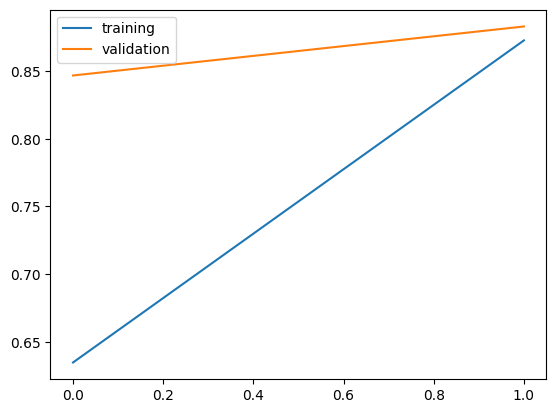

In [19]:
# Training model

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2, batch_size=200)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()


# Evaluating the model

Finally we will evaluate the model on the testing dataset.

In [20]:
# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

238/238 [==============================] - 3s 11ms/step - loss: 0.3898 - accuracy: 0.8889
Baseline Error: 11.11%



# Defining a Deep Model

Now we will define a multi layer neural network in which we will add $2$ hidden layers having $500$ and $100$ neurons.

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding = 'same' , input_shape = input_shape, activation = 'relu'))# Param# = (3*3*32*3)+32=896
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding = 'same', activation = 'relu'))                            # Param# = (3*3*32*32)+32=9248
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding = 'valid'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding = 'same', activation = 'relu'))                            # Param# = (3*3*64*32)+64=18496
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding = 'same', activation = 'relu'))                            # Param# = (3*3*64*64)+64=36928
model.add(Flatten())
model.add(Dense(500, activation='relu'))                                                                        # Param# = (14*14*64*500)+500=6272500
model.add(Dense(100, activation='relu'))                                                                        # Param# = (500*100)+100=50100
model.add(Dense(num_classes, activation='softmax'))                                                             # Param# = (100*10)+10=1010

# Analyzing Model Summary

The following function provides us with detailed summary of the model. We can use it after we have defined
our model.

In [22]:
model.summary() #((3*3)*3)*32 + 32

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                      

Epoch 1/10
122/122 [==============================] - 128s 1s/step - loss: 1.1723 - acc: 0.6003 - val_loss: 0.3695 - val_acc: 0.8846
Epoch 2/10
122/122 [==============================] - 127s 1s/step - loss: 0.2806 - acc: 0.9129 - val_loss: 0.1987 - val_acc: 0.9394
Epoch 3/10
122/122 [==============================] - 127s 1s/step - loss: 0.1633 - acc: 0.9485 - val_loss: 0.1350 - val_acc: 0.9598
Epoch 4/10
122/122 [==============================] - 123s 1s/step - loss: 0.1098 - acc: 0.9642 - val_loss: 0.1123 - val_acc: 0.9651
Epoch 5/10
122/122 [==============================] - 123s 1s/step - loss: 0.0801 - acc: 0.9744 - val_loss: 0.1032 - val_acc: 0.9690
Epoch 6/10
122/122 [==============================] - 130s 1s/step - loss: 0.0655 - acc: 0.9785 - val_loss: 0.0886 - val_acc: 0.9720
Epoch 7/10
122/122 [==============================] - 128s 1s/step - loss: 0.0510 - acc: 0.9835 - val_loss: 0.0856 - val_acc: 0.9740
Epoch 8/10
122/122 [==============================] - 136s 1s/step - 

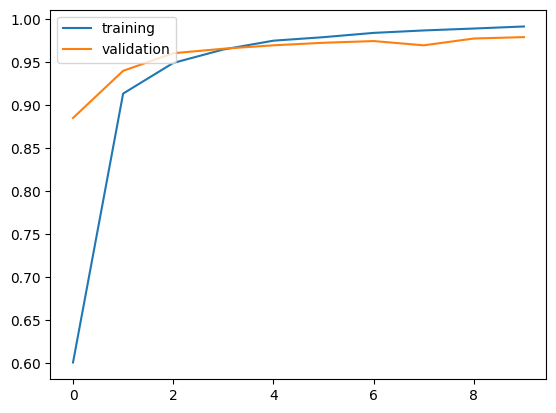

238/238 [==============================] - 12s 49ms/step - loss: 0.0828 - acc: 0.9773
Baseline Error: 2.27%


In [23]:
import h5py

# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Training model

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2, batch_size=200)

# Saving th emodel
model.save_weights('CNN.h5')

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

# Loading the saved model for testing

In [ ]:
model.load_weights('CNN.h5')

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

238/238 [==============================] - 10s 43ms/step - loss: 0.0617 - acc: 0.9876
Baseline Error: 1.24%


# Creating checkpoints of model

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath='CNN_valAcc.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2, batch_size=200, callbacks=callbacks_list)

Epoch 1/2
122/122 [==============================] - ETA: 0s - loss: 0.0080 - acc: 0.9973

122/122 [==============================] - 142s 1s/step - loss: 0.0080 - acc: 0.9973 - val_loss: 0.0569 - val_acc: 0.9880
Epoch 2/2
122/122 [==============================] - ETA: 0s - loss: 0.0083 - acc: 0.9976

122/122 [==============================] - 139s 1s/step - loss: 0.0083 - acc: 0.9976 - val_loss: 0.0503 - val_acc: 0.9885


# Defining learning rate decay for optimizer

In [ ]:
from keras.optimizers import SGD, Adam

# sgd = SGD(learning_rate = 0.001, momentum = 0.0005, decay = 0.0005)

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0005)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=200)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

238/238 [==============================] - 10s 41ms/step - loss: 0.0737 - accuracy: 0.9862
Baseline Error: 1.38%
